<a href="https://colab.research.google.com/github/simonakardel/Machine_Learning_2023/blob/main/Customer_staying_or_not/Customers_staying_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
# Clone repository with data
!git clone https://github.com/simonakardel/Machine_Learning_2023.git

Cloning into 'Machine_Learning_2023'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), 265.75 KiB | 1.65 MiB/s, done.


In [ ]:
# Get the data from a file
dataFrame = pd.read_csv('Machine_Learning_2023/Customer_staying_or_not/customers.csv')

In [ ]:
# See the first five rows
dataFrame.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Drop incomplete data
dataFrame.isnull().sum()
dataFrame.dropna(inplace=True)

In [ ]:
# X - input rows and columns (selected all rows, columns 5-14)
# y - output rows and columns (selected all rows, last column)
pd.set_option('display.max_columns', None)
X = dataFrame.iloc[ : , 5:13]
y = dataFrame.iloc[ : , -1]
#print(dataFrame.iloc[0:5,5:13])

In [ ]:
X = pd.get_dummies(X)
columnNames = list(X.columns)
X = X.values
y = y.values


In [37]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )

In [46]:
model = Sequential()
model.add(Dense(4,activation='relu')) # 4 outputs. It will automatically adapt to number inputs
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
adam = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])



In [49]:
model.fit(X_train,y_train,epochs=100, verbose=1) 


Epoch 1/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3826 - accuracy: 0.8470
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8495
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8469
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8466
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8495
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8484
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3769 - accuracy: 0.8489
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.8496
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8525
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3817 - accura

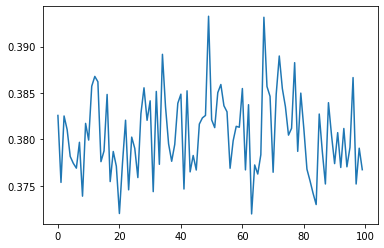

In [50]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)


In [51]:
model.evaluate(X_test,y_test,verbose=1) 

63/63 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.8515


[0.3648987114429474, 0.8514999747276306]

In [52]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)


63/63 [==============================] - 0s 961us/step
[[1528   79]
 [ 218  175]]


In [53]:
print(columnNames)

['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']


In [54]:
model.save('my_model.h5')